+ In This File we have used Scaled dataset for our models
+ Models in this file are listed below
    + 1). Exponential Smoothing Model
    + 2). Prophet Model
    + 3). Auto Ensemble Model(in it we have used Exponential Smoothing Model and Prophet Model)

In [1]:
import shutup
shutup.please()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.graph_objects as go

%matplotlib inline

In [3]:
import plotly.io as pio
# For interactive graph Uncomment " pio.renderers.default = 'notebook' " and and comment " pio.renderers.default = 'png' "
# And then rerun the file on Jupyter Notebook


# pio.renderers.default = 'notebook'
pio.renderers.default = 'png'

In [4]:
# Extract Data from yfinance
import yfinance as yf
import datetime as dttm

startDate = dttm.datetime(2011, 1, 1)
endDate = dttm.datetime(2022, 7, 1)

GetData = yf.Ticker("NESTLEIND.NS")
# print(GetData.history(start=startDate, end=endDate))

yf_data = pd.DataFrame(GetData.history(start=startDate, end=endDate))
yf_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-01-03,3315.502203,3334.762854,3282.076883,3313.040771,5256,0.0,0
2011-01-04,3312.306866,3368.361206,3282.077208,3361.192627,21916,0.0,0
2011-01-05,3345.990302,3398.633035,3330.875478,3369.267090,32381,0.0,0
2011-01-06,3368.446713,3410.768223,3286.394806,3311.269531,16829,0.0,0
2011-01-07,3290.713555,3342.535815,3257.892789,3273.396240,30854,0.0,0


In [5]:
data = yf_data.copy()
data = data.asfreq('B')
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-01-03,3315.502203,3334.762854,3282.076883,3313.040771,5256.0,0.0,0.0
2011-01-04,3312.306866,3368.361206,3282.077208,3361.192627,21916.0,0.0,0.0
2011-01-05,3345.990302,3398.633035,3330.875478,3369.267090,32381.0,0.0,0.0
2011-01-06,3368.446713,3410.768223,3286.394806,3311.269531,16829.0,0.0,0.0
2011-01-07,3290.713555,3342.535815,3257.892789,3273.396240,30854.0,0.0,0.0


In [6]:
data.shape

(2999, 7)

In [7]:
data.ffill(inplace=True)

In [8]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [9]:
final_data = pd.DataFrame(data.Close)
final_data.head()

,Close
Date,
2011-01-03,3313.040771
2011-01-04,3361.192627
2011-01-05,3369.267090
2011-01-06,3311.269531
2011-01-07,3273.396240


In [10]:
n =final_data['2020-01-01':'2022-06-30'].count()

In [11]:
train_data = final_data.iloc[:len(final_data)-652] 
test_data = final_data.iloc[len(final_data)-652:]
train_data.shape, test_data.shape

((2347, 1), (652, 1))

In [12]:
test_data, train_data

(                   Close
 Date                    
 2020-01-01  14215.091797
 2020-01-02  14167.288086
 2020-01-03  14036.717773
 2020-01-06  13866.520508
 2020-01-07  13745.424805
 ...                  ...
 2022-06-24  17231.650391
 2022-06-27  17358.250000
 2022-06-28  17403.900391
 2022-06-29  17499.050781
 2022-06-30  17470.000000
 
 [652 rows x 1 columns],
                    Close
 Date                    
 2011-01-03   3313.040771
 2011-01-04   3361.192627
 2011-01-05   3369.267090
 2011-01-06   3311.269531
 2011-01-07   3273.396240
 ...                  ...
 2019-12-25  14029.409180
 2019-12-26  14042.153320
 2019-12-27  14104.576172
 2019-12-30  14285.163086
 2019-12-31  14221.150391
 
 [2347 rows x 1 columns])

In [13]:
from sklearn.metrics import mean_squared_error

def error(data1, data2):
    mse = mean_squared_error(data1, data2)
    rmse = np.sqrt(mse)
    
    print('Errors :-')
    print('MSE : ',mse)
    print('RMSE : ',rmse,'\n')
    return mse, rmse

# Data Transformation

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler(feature_range=(0.001,1))
train_data_minmax = scaler.fit_transform(np.array(train_data).reshape(-1,1))

In [16]:
train_data_minmax

array([[0.04812574],
       [0.05226319],
       [0.05295699],
       ...,
       [0.97538746],
       [0.99090438],
       [0.98540409]])

In [17]:
train_data_minmax = pd.DataFrame(train_data_minmax, columns = ['close'])
train_data_minmax

,close
0,0.048126
1,0.052263
2,0.052957
3,0.047974
4,0.044719
...,...
2342,0.968929
2343,0.970024
2344,0.975387
2345,0.990904


In [18]:
# train_data_min=scaler.inverse_transform(train_data_minmax)
# train_data_min = pd.DataFrame(train_data_min, columns = ['close'])
# train_data_min
# train_data_minmax.index = train_data.index
# train_data_minmax

In [19]:
# Using plotly.express
import plotly.express as px

px.defaults.template = "ggplot2"

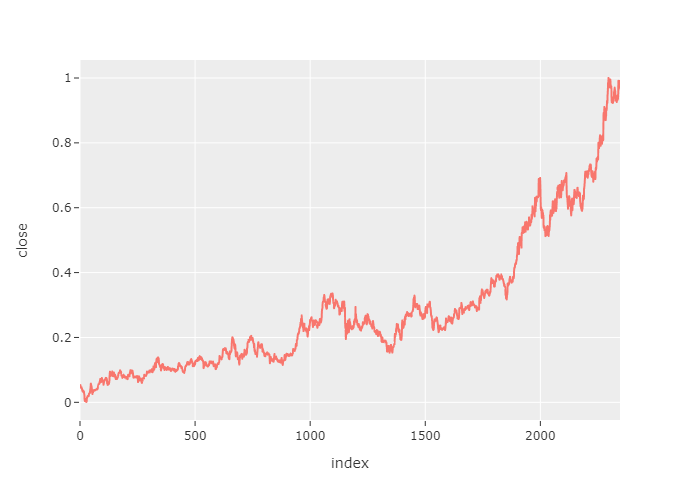

In [20]:
fig = px.line(train_data_minmax, y="close")
fig.show()

In [21]:
# Difference Transformation
# def difference(data, interval):

In [22]:
# fig = px.line(dif_data, y="close")
# fig.show()

In [23]:
# invert difference
def invert_difference(org_data_first_value, diff_data, interval):
    data1 = diff_data.reset_index()
    org_data1 = org_data_first_value
    orgnl_data = []
    for i in range(interval, len(data1)):
        d = diff_data.loc[i-interval] + org_data1
        org_data1=d
        orgnl_data.append(d)
        
    orgnl_data = pd.DataFrame(orgnl_data, columns = diff_data.columns)
    orgnl_data.index = diff_data.index[:len(orgnl_data)]
    return orgnl_data

In [24]:
#invert_difference(train_data_minmax.loc[0], dif_data, 1)
#train_data_minmax

In [25]:
train_data_minmax.index = train_data.index
train_data_minmax

,close
Date,
2011-01-03,0.048126
2011-01-04,0.052263
2011-01-05,0.052957
2011-01-06,0.047974
2011-01-07,0.044719
...,...
2019-12-25,0.968929
2019-12-26,0.970024
2019-12-27,0.975387


In [26]:
# dif_data.index = train_data.index[1:]
# dif_data

# Model Building

In [28]:
from sktime.forecasting.compose import AutoEnsembleForecaster

In [29]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.fbprophet import Prophet

In [30]:
Expo_model = ExponentialSmoothing(trend='add',seasonal='mul',sp=262, damped_trend=False)
Expo_model.fit(train_data_minmax)

ExponentialSmoothing(seasonal='mul', sp=262, trend='add')

In [31]:
fh = list(range(1,653))
# fh1 = pd.DatetimeIndex(np.array(test_data.index))
# fh1
test_predictions_minmax = Expo_model.predict(fh=fh)
test_predictions_minmax

,close
2020-01-01,0.972956
2020-01-02,0.971759
2020-01-03,0.975011
2020-01-06,0.986245
2020-01-07,0.963519
...,...
2022-06-24,1.423920
2022-06-27,1.414813
2022-06-28,1.427853
2022-06-29,1.437339


In [32]:
test_predictions=scaler.inverse_transform(test_predictions_minmax)
test_predictions = pd.DataFrame(test_predictions, columns = ['Close'])
test_predictions.index = test_data.index
test_predictions

,Close
Date,
2020-01-01,14076.283229
2020-01-02,14062.349914
2020-01-03,14100.194753
2020-01-06,14230.939784
2020-01-07,13966.444612
...,...
2022-06-24,19324.627081
2022-06-27,19218.635224
2022-06-28,19370.403577


In [33]:
#fig = go.Figure()

# fig.add_trace(go.Scatter(x=train_data.index, y=train_data['Close'], mode='lines', name='TRAIN'))
# fig.add_trace(go.Scatter(x=test_data.index, y=test_data['Close'], mode='lines', name='TEST'))
# fig.add_trace(go.Scatter(x=test_predictions.index, y=test_predictions['Close'], mode='lines', name='PREDICTION'))

# fig.update_layout(title_text='Forecast vs Actuals', title_x=0.5)
# fig.show()

In [37]:
#mse, rmse = error(test_data['Close'],test_predictions)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import holidays
import random

In [36]:
holiday = pd.DataFrame([])

for date, name in sorted(holidays.India(years=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]).items()):
    holiday = holiday.append(pd.DataFrame({'ds': date, 'holiday': "India_Holidays"}, index=[0]), ignore_index=True)
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')

In [37]:
holiday = holiday[:-4]
holiday

,ds,holiday
0,2011-01-14,India_Holidays
1,2011-01-26,India_Holidays
2,2011-03-19,India_Holidays
3,2011-05-01,India_Holidays
4,2011-08-15,India_Holidays
...,...,...
87,2021-12-25,India_Holidays
88,2022-01-14,India_Holidays
89,2022-01-26,India_Holidays
90,2022-03-18,India_Holidays


In [38]:
from sklearn.model_selection import ParameterGrid
params_grid = {'changepoint_prior_scale':[0.05,1,10,25],
               'n_changepoints' : [1,10,25,100],
               'seasonality_prior_scale':[0.05,1,10,25]}

grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 64


In [40]:
model_parameters = pd.DataFrame(columns = ['Parameters','MSE','RMSE'])
i = 1
for p in grid:
    test = pd.DataFrame()
    print(i,' ',p)
    i = i+1
    random.seed(0)
    train_model =Prophet(freq='B', 
                         changepoint_prior_scale = p['changepoint_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = 'multiplicative',
                         seasonality_prior_scale=p['seasonality_prior_scale'],
                         weekly_seasonality=False,
                         daily_seasonality = False,
                         yearly_seasonality = True,
                         add_country_holidays={'country_name': 'India'}, holidays=holiday)
    train_model.fit(train_data_minmax)
    fh = list(range(1,653))
    test_predictions = train_model.predict(fh=fh)
    test_predictions=scaler.inverse_transform(test_predictions)
    mse, rmse = error(test_data['Close'],test_predictions)
    print('Root Mean Squre Error(RMSE)------------------------------------',rmse)
    model_parameters = model_parameters.append({'Parameters':p, 'MSE':mse, 'RMSE':rmse},ignore_index=True)

1   {'changepoint_prior_scale': 0.05, 'n_changepoints': 1, 'seasonality_prior_scale': 0.05}


07:10:40 - cmdstanpy - INFO - Chain [1] start processing
07:10:41 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3810792.535485538
RMSE :  1952.1251331524672 

Root Mean Squre Error(RMSE)------------------------------------ 1952.1251331524672
2   {'changepoint_prior_scale': 0.05, 'n_changepoints': 1, 'seasonality_prior_scale': 1}


07:10:42 - cmdstanpy - INFO - Chain [1] start processing
07:10:42 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3807641.199371269
RMSE :  1951.3178109603953 

Root Mean Squre Error(RMSE)------------------------------------ 1951.3178109603953
3   {'changepoint_prior_scale': 0.05, 'n_changepoints': 1, 'seasonality_prior_scale': 10}


07:10:43 - cmdstanpy - INFO - Chain [1] start processing
07:10:44 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3809332.305944513
RMSE :  1951.7510870868018 

Root Mean Squre Error(RMSE)------------------------------------ 1951.7510870868018
4   {'changepoint_prior_scale': 0.05, 'n_changepoints': 1, 'seasonality_prior_scale': 25}


07:10:45 - cmdstanpy - INFO - Chain [1] start processing
07:10:45 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3806689.7137746196
RMSE :  1951.0739898257625 

Root Mean Squre Error(RMSE)------------------------------------ 1951.0739898257625
5   {'changepoint_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_prior_scale': 0.05}


07:10:46 - cmdstanpy - INFO - Chain [1] start processing
07:10:47 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2335662.2873186
RMSE :  1528.2873706599162 

Root Mean Squre Error(RMSE)------------------------------------ 1528.2873706599162
6   {'changepoint_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_prior_scale': 1}


07:10:48 - cmdstanpy - INFO - Chain [1] start processing
07:10:48 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2345693.2068657866
RMSE :  1531.5656064517075 

Root Mean Squre Error(RMSE)------------------------------------ 1531.5656064517075
7   {'changepoint_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_prior_scale': 10}


07:10:50 - cmdstanpy - INFO - Chain [1] start processing
07:10:50 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2345559.7498722076
RMSE :  1531.5220370181448 

Root Mean Squre Error(RMSE)------------------------------------ 1531.5220370181448
8   {'changepoint_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_prior_scale': 25}


07:10:51 - cmdstanpy - INFO - Chain [1] start processing
07:10:52 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2338569.7876195186
RMSE :  1529.2383030840938 

Root Mean Squre Error(RMSE)------------------------------------ 1529.2383030840938
9   {'changepoint_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_prior_scale': 0.05}


07:10:53 - cmdstanpy - INFO - Chain [1] start processing
07:10:54 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2349719.9304394135
RMSE :  1532.8796203353393 

Root Mean Squre Error(RMSE)------------------------------------ 1532.8796203353393
10   {'changepoint_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_prior_scale': 1}


07:10:55 - cmdstanpy - INFO - Chain [1] start processing
07:10:56 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2349317.165425463
RMSE :  1532.7482394135911 

Root Mean Squre Error(RMSE)------------------------------------ 1532.7482394135911
11   {'changepoint_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_prior_scale': 10}


07:10:58 - cmdstanpy - INFO - Chain [1] start processing
07:10:58 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2356379.3573019574
RMSE :  1535.0502784280252 

Root Mean Squre Error(RMSE)------------------------------------ 1535.0502784280252
12   {'changepoint_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_prior_scale': 25}


07:11:00 - cmdstanpy - INFO - Chain [1] start processing
07:11:01 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2346648.4844046244
RMSE :  1531.8774377882273 

Root Mean Squre Error(RMSE)------------------------------------ 1531.8774377882273
13   {'changepoint_prior_scale': 0.05, 'n_changepoints': 100, 'seasonality_prior_scale': 0.05}


07:11:02 - cmdstanpy - INFO - Chain [1] start processing
07:11:08 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2344972.8432701966
RMSE :  1531.330416099085 

Root Mean Squre Error(RMSE)------------------------------------ 1531.330416099085
14   {'changepoint_prior_scale': 0.05, 'n_changepoints': 100, 'seasonality_prior_scale': 1}


07:11:11 - cmdstanpy - INFO - Chain [1] start processing
07:11:15 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2347162.2743992587
RMSE :  1532.0451280557172 

Root Mean Squre Error(RMSE)------------------------------------ 1532.0451280557172
15   {'changepoint_prior_scale': 0.05, 'n_changepoints': 100, 'seasonality_prior_scale': 10}


07:11:18 - cmdstanpy - INFO - Chain [1] start processing
07:11:23 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2354516.9111999674
RMSE :  1534.443518413098 

Root Mean Squre Error(RMSE)------------------------------------ 1534.443518413098
16   {'changepoint_prior_scale': 0.05, 'n_changepoints': 100, 'seasonality_prior_scale': 25}


07:11:26 - cmdstanpy - INFO - Chain [1] start processing
07:11:32 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2348701.109399035
RMSE :  1532.5472617179005 

Root Mean Squre Error(RMSE)------------------------------------ 1532.5472617179005
17   {'changepoint_prior_scale': 1, 'n_changepoints': 1, 'seasonality_prior_scale': 0.05}


07:11:34 - cmdstanpy - INFO - Chain [1] start processing
07:11:34 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3903148.9741242365
RMSE :  1975.6388774581849 

Root Mean Squre Error(RMSE)------------------------------------ 1975.6388774581849
18   {'changepoint_prior_scale': 1, 'n_changepoints': 1, 'seasonality_prior_scale': 1}


07:11:35 - cmdstanpy - INFO - Chain [1] start processing
07:11:35 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3896889.0672571464
RMSE :  1974.053967665815 

Root Mean Squre Error(RMSE)------------------------------------ 1974.053967665815
19   {'changepoint_prior_scale': 1, 'n_changepoints': 1, 'seasonality_prior_scale': 10}


07:11:36 - cmdstanpy - INFO - Chain [1] start processing
07:11:37 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3901184.6444638134
RMSE :  1975.14167706112 

Root Mean Squre Error(RMSE)------------------------------------ 1975.14167706112
20   {'changepoint_prior_scale': 1, 'n_changepoints': 1, 'seasonality_prior_scale': 25}


07:11:38 - cmdstanpy - INFO - Chain [1] start processing
07:11:38 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3898513.1216205144
RMSE :  1974.4652748581107 

Root Mean Squre Error(RMSE)------------------------------------ 1974.4652748581107
21   {'changepoint_prior_scale': 1, 'n_changepoints': 10, 'seasonality_prior_scale': 0.05}


07:11:39 - cmdstanpy - INFO - Chain [1] start processing
07:11:39 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2323080.704873769
RMSE :  1524.1655765938847 

Root Mean Squre Error(RMSE)------------------------------------ 1524.1655765938847
22   {'changepoint_prior_scale': 1, 'n_changepoints': 10, 'seasonality_prior_scale': 1}


07:11:41 - cmdstanpy - INFO - Chain [1] start processing
07:11:41 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2325324.0832180786
RMSE :  1524.9013355683308 

Root Mean Squre Error(RMSE)------------------------------------ 1524.9013355683308
23   {'changepoint_prior_scale': 1, 'n_changepoints': 10, 'seasonality_prior_scale': 10}


07:11:42 - cmdstanpy - INFO - Chain [1] start processing
07:11:42 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2324535.7907113344
RMSE :  1524.6428403765042 

Root Mean Squre Error(RMSE)------------------------------------ 1524.6428403765042
24   {'changepoint_prior_scale': 1, 'n_changepoints': 10, 'seasonality_prior_scale': 25}


07:11:44 - cmdstanpy - INFO - Chain [1] start processing
07:11:44 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2325747.4041386275
RMSE :  1525.0401319764105 

Root Mean Squre Error(RMSE)------------------------------------ 1525.0401319764105
25   {'changepoint_prior_scale': 1, 'n_changepoints': 25, 'seasonality_prior_scale': 0.05}


07:11:45 - cmdstanpy - INFO - Chain [1] start processing
07:11:47 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2576163.706240767
RMSE :  1605.043210085251 

Root Mean Squre Error(RMSE)------------------------------------ 1605.043210085251
26   {'changepoint_prior_scale': 1, 'n_changepoints': 25, 'seasonality_prior_scale': 1}


07:11:49 - cmdstanpy - INFO - Chain [1] start processing
07:11:50 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2575622.0344111854
RMSE :  1604.8744606389578 

Root Mean Squre Error(RMSE)------------------------------------ 1604.8744606389578
27   {'changepoint_prior_scale': 1, 'n_changepoints': 25, 'seasonality_prior_scale': 10}


07:11:52 - cmdstanpy - INFO - Chain [1] start processing
07:11:54 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2572608.8370623603
RMSE :  1603.9354217244409 

Root Mean Squre Error(RMSE)------------------------------------ 1603.9354217244409
28   {'changepoint_prior_scale': 1, 'n_changepoints': 25, 'seasonality_prior_scale': 25}


07:11:55 - cmdstanpy - INFO - Chain [1] start processing
07:11:57 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2577015.0489406306
RMSE :  1605.3083968324063 

Root Mean Squre Error(RMSE)------------------------------------ 1605.3083968324063
29   {'changepoint_prior_scale': 1, 'n_changepoints': 100, 'seasonality_prior_scale': 0.05}


07:11:59 - cmdstanpy - INFO - Chain [1] start processing
07:12:16 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2787625.9295124034
RMSE :  1669.6184981942442 

Root Mean Squre Error(RMSE)------------------------------------ 1669.6184981942442
30   {'changepoint_prior_scale': 1, 'n_changepoints': 100, 'seasonality_prior_scale': 1}


07:12:19 - cmdstanpy - INFO - Chain [1] start processing
07:12:37 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2774001.387233197
RMSE :  1665.5333641909422 

Root Mean Squre Error(RMSE)------------------------------------ 1665.5333641909422
31   {'changepoint_prior_scale': 1, 'n_changepoints': 100, 'seasonality_prior_scale': 10}


07:12:39 - cmdstanpy - INFO - Chain [1] start processing
07:12:55 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2794646.0402521244
RMSE :  1671.7194861136616 

Root Mean Squre Error(RMSE)------------------------------------ 1671.7194861136616
32   {'changepoint_prior_scale': 1, 'n_changepoints': 100, 'seasonality_prior_scale': 25}


07:12:57 - cmdstanpy - INFO - Chain [1] start processing
07:13:15 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2789175.553298173
RMSE :  1670.0824989497294 

Root Mean Squre Error(RMSE)------------------------------------ 1670.0824989497294
33   {'changepoint_prior_scale': 10, 'n_changepoints': 1, 'seasonality_prior_scale': 0.05}


07:13:18 - cmdstanpy - INFO - Chain [1] start processing
07:13:18 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3912733.1216276074
RMSE :  1978.0629721087262 

Root Mean Squre Error(RMSE)------------------------------------ 1978.0629721087262
34   {'changepoint_prior_scale': 10, 'n_changepoints': 1, 'seasonality_prior_scale': 1}


07:13:19 - cmdstanpy - INFO - Chain [1] start processing
07:13:19 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3905482.3769452916
RMSE :  1976.229333084926 

Root Mean Squre Error(RMSE)------------------------------------ 1976.229333084926
35   {'changepoint_prior_scale': 10, 'n_changepoints': 1, 'seasonality_prior_scale': 10}


07:13:20 - cmdstanpy - INFO - Chain [1] start processing
07:13:20 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3904985.494681475
RMSE :  1976.1036143586894 

Root Mean Squre Error(RMSE)------------------------------------ 1976.1036143586894
36   {'changepoint_prior_scale': 10, 'n_changepoints': 1, 'seasonality_prior_scale': 25}


07:13:21 - cmdstanpy - INFO - Chain [1] start processing
07:13:22 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3904949.068361195
RMSE :  1976.0943976341805 

Root Mean Squre Error(RMSE)------------------------------------ 1976.0943976341805
37   {'changepoint_prior_scale': 10, 'n_changepoints': 10, 'seasonality_prior_scale': 0.05}


07:13:23 - cmdstanpy - INFO - Chain [1] start processing
07:13:23 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2322545.7047294257
RMSE :  1523.9900605743549 

Root Mean Squre Error(RMSE)------------------------------------ 1523.9900605743549
38   {'changepoint_prior_scale': 10, 'n_changepoints': 10, 'seasonality_prior_scale': 1}


07:13:24 - cmdstanpy - INFO - Chain [1] start processing
07:13:25 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2325189.504764803
RMSE :  1524.8572079918838 

Root Mean Squre Error(RMSE)------------------------------------ 1524.8572079918838
39   {'changepoint_prior_scale': 10, 'n_changepoints': 10, 'seasonality_prior_scale': 10}


07:13:26 - cmdstanpy - INFO - Chain [1] start processing
07:13:26 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2325826.635565508
RMSE :  1525.066108588578 

Root Mean Squre Error(RMSE)------------------------------------ 1525.066108588578
40   {'changepoint_prior_scale': 10, 'n_changepoints': 10, 'seasonality_prior_scale': 25}


07:13:27 - cmdstanpy - INFO - Chain [1] start processing
07:13:28 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2324890.8522191136
RMSE :  1524.7592768103145 

Root Mean Squre Error(RMSE)------------------------------------ 1524.7592768103145
41   {'changepoint_prior_scale': 10, 'n_changepoints': 25, 'seasonality_prior_scale': 0.05}


07:13:29 - cmdstanpy - INFO - Chain [1] start processing
07:13:31 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2577678.102728725
RMSE :  1605.5149026803597 

Root Mean Squre Error(RMSE)------------------------------------ 1605.5149026803597
42   {'changepoint_prior_scale': 10, 'n_changepoints': 25, 'seasonality_prior_scale': 1}


07:13:33 - cmdstanpy - INFO - Chain [1] start processing
07:13:34 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2586720.738445845
RMSE :  1608.3285542593107 

Root Mean Squre Error(RMSE)------------------------------------ 1608.3285542593107
43   {'changepoint_prior_scale': 10, 'n_changepoints': 25, 'seasonality_prior_scale': 10}


07:13:36 - cmdstanpy - INFO - Chain [1] start processing
07:13:38 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2586705.4408411514
RMSE :  1608.3237985061191 

Root Mean Squre Error(RMSE)------------------------------------ 1608.3237985061191
44   {'changepoint_prior_scale': 10, 'n_changepoints': 25, 'seasonality_prior_scale': 25}


07:13:39 - cmdstanpy - INFO - Chain [1] start processing
07:13:41 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2584535.267338453
RMSE :  1607.648987602223 

Root Mean Squre Error(RMSE)------------------------------------ 1607.648987602223
45   {'changepoint_prior_scale': 10, 'n_changepoints': 100, 'seasonality_prior_scale': 0.05}


07:13:42 - cmdstanpy - INFO - Chain [1] start processing
07:14:00 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2809069.625763874
RMSE :  1676.0279310810647 

Root Mean Squre Error(RMSE)------------------------------------ 1676.0279310810647
46   {'changepoint_prior_scale': 10, 'n_changepoints': 100, 'seasonality_prior_scale': 1}


07:14:03 - cmdstanpy - INFO - Chain [1] start processing
07:14:21 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2871857.620749549
RMSE :  1694.6556053515856 

Root Mean Squre Error(RMSE)------------------------------------ 1694.6556053515856
47   {'changepoint_prior_scale': 10, 'n_changepoints': 100, 'seasonality_prior_scale': 10}


07:14:23 - cmdstanpy - INFO - Chain [1] start processing
07:14:42 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2787005.538172366
RMSE :  1669.4326995037463 

Root Mean Squre Error(RMSE)------------------------------------ 1669.4326995037463
48   {'changepoint_prior_scale': 10, 'n_changepoints': 100, 'seasonality_prior_scale': 25}


07:14:44 - cmdstanpy - INFO - Chain [1] start processing
07:15:03 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2821432.9489727113
RMSE :  1679.7121625364005 

Root Mean Squre Error(RMSE)------------------------------------ 1679.7121625364005
49   {'changepoint_prior_scale': 25, 'n_changepoints': 1, 'seasonality_prior_scale': 0.05}


07:15:05 - cmdstanpy - INFO - Chain [1] start processing
07:15:05 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3908045.641383318
RMSE :  1976.8777507431557 

Root Mean Squre Error(RMSE)------------------------------------ 1976.8777507431557
50   {'changepoint_prior_scale': 25, 'n_changepoints': 1, 'seasonality_prior_scale': 1}


07:15:06 - cmdstanpy - INFO - Chain [1] start processing
07:15:06 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3904615.246206076
RMSE :  1976.0099306952068 

Root Mean Squre Error(RMSE)------------------------------------ 1976.0099306952068
51   {'changepoint_prior_scale': 25, 'n_changepoints': 1, 'seasonality_prior_scale': 10}


07:15:08 - cmdstanpy - INFO - Chain [1] start processing
07:15:08 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3903904.3777866005
RMSE :  1975.830047799304 

Root Mean Squre Error(RMSE)------------------------------------ 1975.830047799304
52   {'changepoint_prior_scale': 25, 'n_changepoints': 1, 'seasonality_prior_scale': 25}


07:15:09 - cmdstanpy - INFO - Chain [1] start processing
07:15:09 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3907620.299628624
RMSE :  1976.7701686409132 

Root Mean Squre Error(RMSE)------------------------------------ 1976.7701686409132
53   {'changepoint_prior_scale': 25, 'n_changepoints': 10, 'seasonality_prior_scale': 0.05}


07:15:10 - cmdstanpy - INFO - Chain [1] start processing
07:15:10 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2322585.2074156497
RMSE :  1524.0030208026656 

Root Mean Squre Error(RMSE)------------------------------------ 1524.0030208026656
54   {'changepoint_prior_scale': 25, 'n_changepoints': 10, 'seasonality_prior_scale': 1}


07:15:12 - cmdstanpy - INFO - Chain [1] start processing
07:15:12 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2325250.0707511646
RMSE :  1524.8770674225398 

Root Mean Squre Error(RMSE)------------------------------------ 1524.8770674225398
55   {'changepoint_prior_scale': 25, 'n_changepoints': 10, 'seasonality_prior_scale': 10}


07:15:13 - cmdstanpy - INFO - Chain [1] start processing
07:15:14 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2325371.7699757083
RMSE :  1524.9169715022874 

Root Mean Squre Error(RMSE)------------------------------------ 1524.9169715022874
56   {'changepoint_prior_scale': 25, 'n_changepoints': 10, 'seasonality_prior_scale': 25}


07:15:15 - cmdstanpy - INFO - Chain [1] start processing
07:15:15 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2325891.3556494224
RMSE :  1525.08732722078 

Root Mean Squre Error(RMSE)------------------------------------ 1525.08732722078
57   {'changepoint_prior_scale': 25, 'n_changepoints': 25, 'seasonality_prior_scale': 0.05}


07:15:16 - cmdstanpy - INFO - Chain [1] start processing
07:15:18 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2574367.9784282143
RMSE :  1604.4837108640943 

Root Mean Squre Error(RMSE)------------------------------------ 1604.4837108640943
58   {'changepoint_prior_scale': 25, 'n_changepoints': 25, 'seasonality_prior_scale': 1}


07:15:20 - cmdstanpy - INFO - Chain [1] start processing
07:15:22 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2585150.6412081528
RMSE :  1607.8403655861339 

Root Mean Squre Error(RMSE)------------------------------------ 1607.8403655861339
59   {'changepoint_prior_scale': 25, 'n_changepoints': 25, 'seasonality_prior_scale': 10}


07:15:23 - cmdstanpy - INFO - Chain [1] start processing
07:15:25 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2580721.601925619
RMSE :  1606.4624495846826 

Root Mean Squre Error(RMSE)------------------------------------ 1606.4624495846826
60   {'changepoint_prior_scale': 25, 'n_changepoints': 25, 'seasonality_prior_scale': 25}


07:15:26 - cmdstanpy - INFO - Chain [1] start processing
07:15:28 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2573842.1173766144
RMSE :  1604.3198301388081 

Root Mean Squre Error(RMSE)------------------------------------ 1604.3198301388081
61   {'changepoint_prior_scale': 25, 'n_changepoints': 100, 'seasonality_prior_scale': 0.05}


07:15:29 - cmdstanpy - INFO - Chain [1] start processing
07:15:49 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2718664.9893575655
RMSE :  1648.8374660219138 

Root Mean Squre Error(RMSE)------------------------------------ 1648.8374660219138
62   {'changepoint_prior_scale': 25, 'n_changepoints': 100, 'seasonality_prior_scale': 1}


07:15:51 - cmdstanpy - INFO - Chain [1] start processing
07:16:10 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2820777.2167774867
RMSE :  1679.516959359889 

Root Mean Squre Error(RMSE)------------------------------------ 1679.516959359889
63   {'changepoint_prior_scale': 25, 'n_changepoints': 100, 'seasonality_prior_scale': 10}


07:16:12 - cmdstanpy - INFO - Chain [1] start processing
07:16:31 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2834400.6481799153
RMSE :  1683.5678329606785 

Root Mean Squre Error(RMSE)------------------------------------ 1683.5678329606785
64   {'changepoint_prior_scale': 25, 'n_changepoints': 100, 'seasonality_prior_scale': 25}


07:16:33 - cmdstanpy - INFO - Chain [1] start processing
07:16:53 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2803193.2714256216
RMSE :  1674.2739535170526 

Root Mean Squre Error(RMSE)------------------------------------ 1674.2739535170526


In [41]:
len(grid)

64

In [42]:
parameters = model_parameters.sort_values(by=['RMSE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

,Parameters,MSE,RMSE
0,"{'changepoint_prior_scale': 10, 'n_changepoint...",2322545.704729,1523.990061
1,"{'changepoint_prior_scale': 25, 'n_changepoint...",2322585.207416,1524.003021
2,"{'changepoint_prior_scale': 1, 'n_changepoints...",2323080.704874,1524.165577
3,"{'changepoint_prior_scale': 1, 'n_changepoints...",2324535.790711,1524.64284
4,"{'changepoint_prior_scale': 10, 'n_changepoint...",2324890.852219,1524.759277


In [43]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 10,
 'n_changepoints': 10,
 'seasonality_prior_scale': 0.05}

In [44]:
Pro_model = Prophet(freq='B', seasonality_mode='multiplicative', 
                    changepoint_prior_scale=parameters['Parameters'][0]['changepoint_prior_scale'], 
                    n_changepoints=parameters['Parameters'][0]['n_changepoints'], 
                    seasonality_prior_scale=parameters['Parameters'][0]['seasonality_prior_scale'], 
                    add_country_holidays={'country_name': 'India'}, verbose=10,
                    holidays=holiday,
                    yearly_seasonality=True, weekly_seasonality=False , daily_seasonality=False)
Pro_model.fit(train_data_minmax)

07:17:10 - cmdstanpy - INFO - Chain [1] start processing
07:17:10 - cmdstanpy - INFO - Chain [1] done processing


Prophet(add_country_holidays={'country_name': 'India'},
        changepoint_prior_scale=10, daily_seasonality=False, freq='B',
        holidays=           ds         holiday
0  2011-01-14  India_Holidays
1  2011-01-26  India_Holidays
2  2011-03-19  India_Holidays
3  2011-05-01  India_Holidays
4  2011-08-15  India_Holidays
..        ...             ...
87 2021-12-25  India_Holidays
88 2022-01-14  India_Holidays
89 2022-01-26  India_Holidays
90 2022-03-18  India_Holidays
91 2022-05-01  India_Holidays

[92 rows x 2 columns],
        n_changepoints=10, seasonality_mode='multiplicative',
        seasonality_prior_scale=0.05, verbose=10, weekly_seasonality=False,
        yearly_seasonality=True)

In [45]:
fh = list(range(1,653))
# fh1 = pd.DatetimeIndex(np.array(test_data.index))
# fh1
test_predictions_minmax = Pro_model.predict(fh=fh)
test_predictions_minmax

,close
2020-01-01,0.901530
2020-01-02,0.900125
2020-01-03,0.898556
2020-01-06,0.894734
2020-01-07,0.893811
...,...
2022-06-24,1.471435
2022-06-27,1.475125
2022-06-28,1.476545
2022-06-29,1.478021


In [46]:
test_predictions=scaler.inverse_transform(test_predictions_minmax)
test_predictions = pd.DataFrame(test_predictions, columns = ['Close'])
test_predictions.index = test_data.index
test_predictions

,Close
Date,
2020-01-01,13245.013238
2020-01-02,13228.661478
2020-01-03,13210.406857
2020-01-06,13165.919964
2020-01-07,13155.187732
...,...
2022-06-24,19877.616664
2022-06-27,19920.553408
2022-06-28,19937.087631


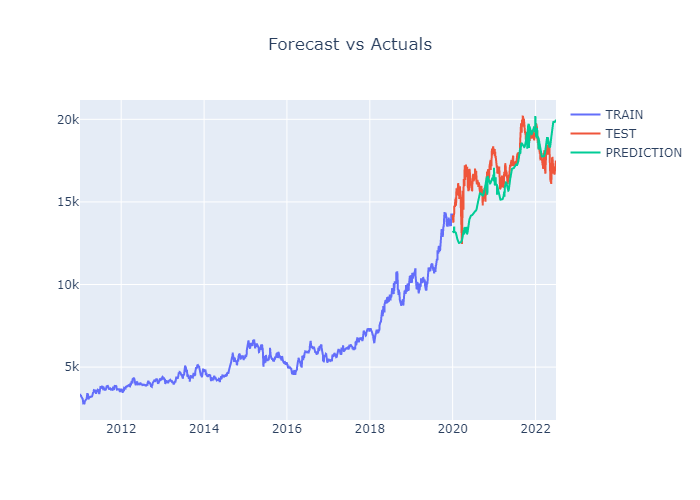

In [47]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=train_data.index, y=train_data['Close'], mode='lines', name='TRAIN'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['Close'], mode='lines', name='TEST'))
fig.add_trace(go.Scatter(x=test_predictions.index, y=test_predictions['Close'], mode='lines', name='PREDICTION'))

fig.update_layout(title_text='Forecast vs Actuals', title_x=0.5)
fig.show()

# Auto Ensemble Forecaster

In [48]:
from sktime.forecasting.compose import AutoEnsembleForecaster

In [49]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.fbprophet import Prophet

In [50]:
Pro_model = Prophet(freq='B', seasonality_mode='multiplicative', 
                    changepoint_prior_scale=25, 
                    n_changepoints=10, 
                    seasonality_prior_scale=0.05, 
                    add_country_holidays={'country_name': 'India'}, verbose=10,
                    holidays=holiday,
                    yearly_seasonality=True, weekly_seasonality=False , daily_seasonality=False)
# Pro_model.fit(train_data)

In [51]:
Expo_model = ExponentialSmoothing(trend='add',seasonal='mul',sp=262, damped_trend=False)
# Expo_model.fit(train_data_minmax)

In [52]:
forecasters = [
    ("prophet" , Pro_model),
    ("expo" , Expo_model)
]

In [53]:
Ensmodel = AutoEnsembleForecaster(forecasters=forecasters, n_jobs=-1, random_state=42)
Ensmodel.fit(train_data_minmax)

AutoEnsembleForecaster(forecasters=[('prophet',
                                     Prophet(add_country_holidays={'country_name': 'India'},
                                             changepoint_prior_scale=25,
                                             daily_seasonality=False, freq='B',
                                             holidays=           ds         holiday
0  2011-01-14  India_Holidays
1  2011-01-26  India_Holidays
2  2011-03-19  India_Holidays
3  2011-05-01  India_Holidays
4  2011-08-15  India_Holidays
..        ...             ...
87 2021-12-25  India_Holidays
88 2022-01-14  India_Holidays
89 2022-01-26  India_Holidays
90 2022-03-18  India_Holidays
91 2022-05-01  India_Holidays

[92 rows x 2 columns],
                                             n_changepoints=10,
                                             seasonality_mode='multiplicative',
                                             seasonality_prior_scale=0.05,
                                             verb

In [54]:
fh = list(range(1,653))
# fh1 = pd.DatetimeIndex(np.array(test_data.index))
# fh1
test_predictionsEns = Ensmodel.predict(fh=fh)
test_predictionsEns

,close
2020-01-01,0.963144
2020-01-02,0.961932
2020-01-03,0.964523
2020-01-06,0.973692
2020-01-07,0.953955
...,...
2022-06-24,1.430437
2022-06-27,1.423085
2022-06-28,1.434533
2022-06-29,1.442921


In [55]:
test_predictions=scaler.inverse_transform(test_predictionsEns)
test_predictions = pd.DataFrame(test_predictions, columns = ['Close'])
test_predictions.index = test_data.index
test_predictions

,Close
Date,
2020-01-01,13962.091623
2020-01-02,13947.983936
2020-01-03,13978.132537
2020-01-06,14084.845524
2020-01-07,13855.141424
...,...
2022-06-24,19400.475365
2022-06-27,19314.912926
2022-06-28,19448.143424


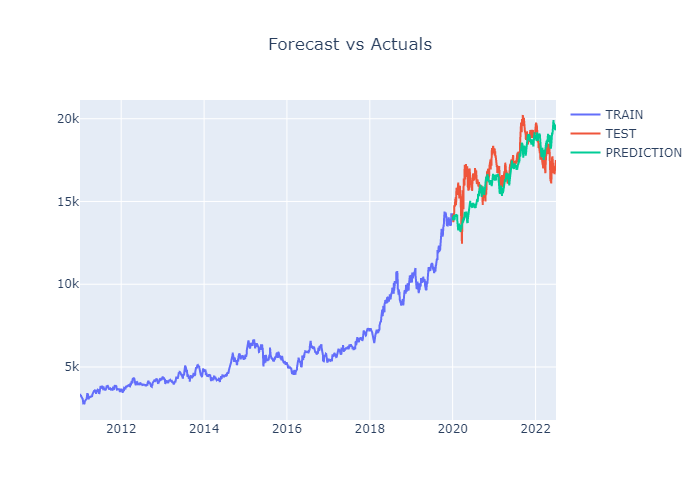

In [56]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=train_data.index, y=train_data['Close'], mode='lines', name='TRAIN'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['Close'], mode='lines', name='TEST'))
fig.add_trace(go.Scatter(x=test_predictions.index, y=test_predictions['Close'], mode='lines', name='PREDICTION'))

fig.update_layout(title_text='Forecast vs Actuals', title_x=0.5)
fig.show()

In [59]:
mse, rmse = error(test_data['Close'],test_predictions)

Errors :-
MSE :  1524639.5937365696
RMSE :  1234.7629706695004 

